**Hello and wellcome**

The Titanic dataset is a well-known collection of information related to the passengers on board the RMS Titanic during its ill-fated maiden voyage in 1912. The primary objective of analyzing this dataset is to gain insights into the factors that influenced passenger survival, considering various variables such as the number of accompanying children, gender, age, ticket class, cabin location, and more.

This dataset serves as a valuable resource for understanding the demographics and characteristics of those who perished and those who survived the tragic sinking of the Titanic. By exploring the relationships between survival and different features, we can uncover patterns and trends that shed light on the circumstances surrounding this historic maritime disaster.

**First we import libraries**

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

**Let's Read datas for both train and test**

In [2]:
# Read the data
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

**Check out head of the train data**

In [3]:
# check the head
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Next get the shape of train and test datas**

In [4]:
# check the shape
a=train_data.shape
b=test_data.shape
print(f"train data's shape is: {a}\ntest data's shape is: {b}")

train data's shape is: (891, 12)
test data's shape is: (418, 11)


**Check missing values**
1. Train Data:

In [5]:
# check the missing values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

2. Test Data:

In [6]:
# Check the missing values for Test data
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**General review of all columns with describe function**

In [7]:
# main check for each column
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Data Visulization**

* Data visualization is a powerful method to explore and communicate insights from datasets. In our analysis, we employed various visualization techniques to gain a comprehensive understanding of the data. Histograms were utilized to illustrate the distribution of several variables, such as "Survived", "Age", "Pclass", "SibSp", and "Parch". Additionally, pie charts were employed to visualize the composition of categorical variables like "Sex" and "Embarked".

* To uncover relationships between numeric variables, a correlation heatmap was generated, providing a visual representation of the correlation coefficients. This heat map allows for a quick identification of potential patterns and dependencies within the dataset.

* Furthermore, survival rates were examined by creating bar charts that depict the distribution of survival outcomes based on "Sex" and "Pclass". These visualizations offer valuable insights into the impact of different factors on survival probabilities.

The combination of these visualizations not only enhances our understanding of individual variables but also enables us to explore intricate relationships and patterns within the dataset, facilitating more informed analyses and decision-making processes.

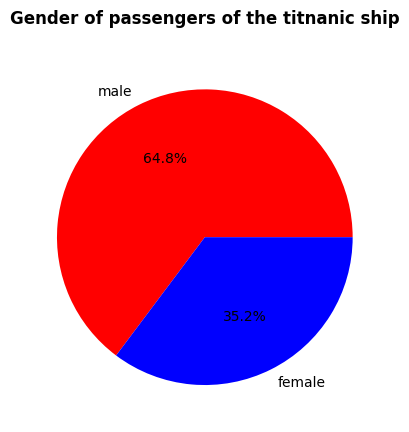

In [8]:
# Pie chart for Sex column
Sex_count = Counter(list(train_data['Sex']))

Sex_name = list(Sex_count.keys())
Sex_value = list(Sex_count.values())

plt.figure('Pie chart')
plt.pie(Sex_value, labels=Sex_name, colors=['r','b'], autopct='%.1f%%')
plt.title("Gender of passengers of the titnanic ship\n",fontweight = "bold")
plt.show()

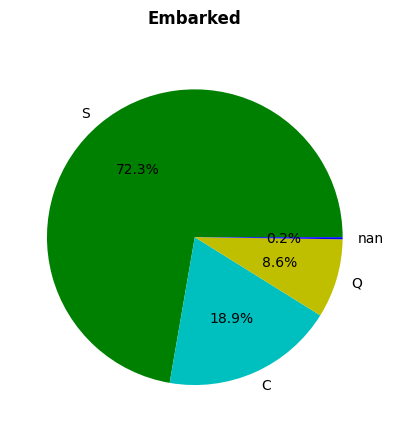

In [9]:
# Pie chart for Embarked column
Emb_count = Counter(list(train_data['Embarked']))

Emb_name = list(Emb_count.keys())
Emb_value = list(Emb_count.values())

plt.figure('Pie chart for Embarked')
plt.pie(Emb_value, labels=Emb_name, colors=['g','c','y','b'], autopct='%.1f%%')
plt.title('Embarked\n',fontweight = "bold")
plt.show()

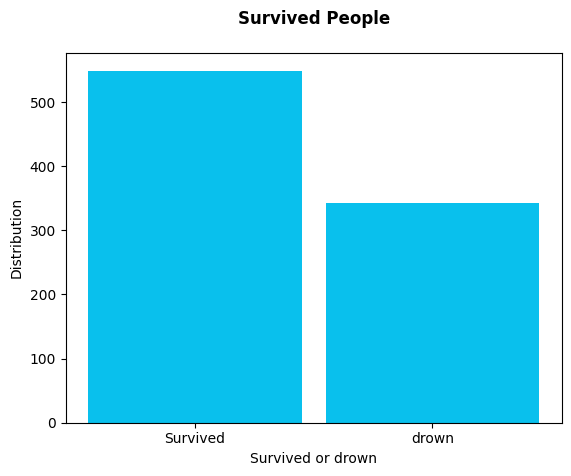

In [10]:
# pie chart for Survived/drown people
list_survived= list(train_data.iloc[:,1])
bins = 2

plt.figure('Histogram for Survived people')
plt.hist(list_survived, bins, histtype='bar', rwidth=0.9, color='#09c0ed')
plt.title('Survived People\n',fontweight = "bold")
plt.xlabel('Survived or drown')
plt.ylabel('Distribution')
bin_center = 0.5 * ( plt.hist(list_survived, bins, rwidth=0.9, color='#09c0ed')[1][1:] + plt.hist(list_survived, bins, rwidth=0.9, color='#09c0ed')[1][:-1])
plt.xticks(bin_center, ['Survived', 'drown'])
plt.show()

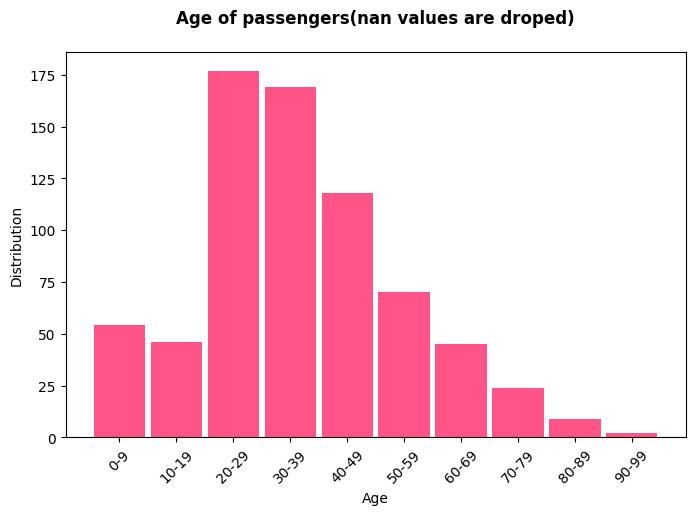

In [11]:
# Histogram chart for age
list_age = list(train_data.iloc[:,5].dropna())
bins = 10

plt.figure('Histogram for Age', figsize=(8,5))
plt.hist(list_age, bins, histtype='bar',rwidth=0.9, color='#FF5487')
plt.xlabel('Age')
plt.title('Age of passengers(nan values are droped)\n',fontweight = "bold")
plt.ylabel('Distribution')
bin_center = 0.5 * ( plt.hist(list_age, bins, rwidth=0.9, color='#FF5487')[1][1:] + plt.hist(list_age, bins, rwidth=0.9, color='#FF5487')[1][:-1])
plt.xticks(bin_center,['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99'], rotation=45)
plt.show()

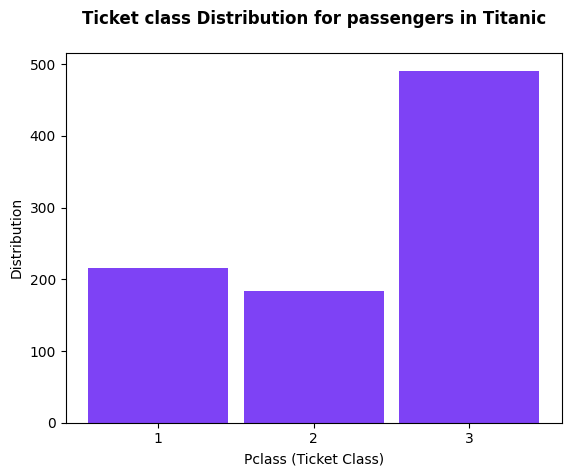

In [12]:
# Histogram chart for Pclass (Ticket Class)
list_pclass= list(train_data.iloc[:,2])
bins = 3

plt.figure('Histogram for Pclass(Ticket Class)')
plt.hist(list_pclass, bins, histtype='bar', rwidth=0.9, color='#7E42F5')
plt.title('Ticket class Distribution for passengers in Titanic\n',fontweight = "bold")
plt.xlabel('Pclass (Ticket Class)')
plt.ylabel('Distribution')
bin_center = 0.5 * ( plt.hist(list_pclass, bins, rwidth=0.9, color='#7E42F5')[1][1:] + plt.hist(list_pclass, bins, rwidth=0.9, color='#7E42F5')[1][:-1])
plt.xticks(bin_center, [1,2,3])
plt.show()

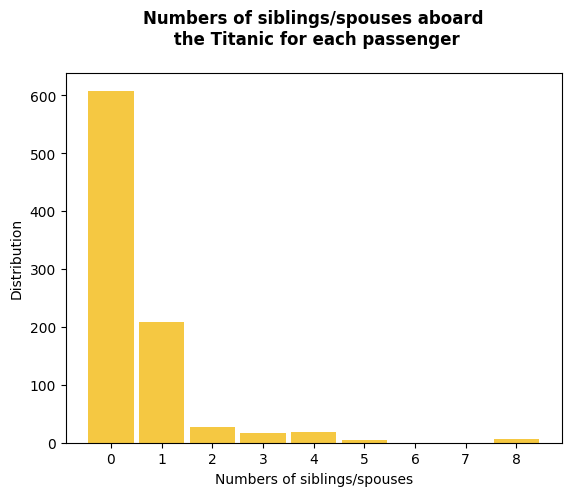

In [13]:
# Histogram chart for sibsp (of siblings / spouses aboard the Titanic)
list_sibsp = list(train_data.iloc[:,6])
bins = 9

plt.figure('Histogram for SibSp')
plt.hist(list_sibsp, bins, rwidth=0.9, color='#f5c842' , histtype='bar')
plt.title('Numbers of siblings/spouses aboard\n the Titanic for each passenger\n',fontweight='bold')
plt.xlabel('Numbers of siblings/spouses')
plt.ylabel('Distribution')
bin_center = 0.5 * ( plt.hist(list_sibsp, bins, rwidth=0.9, color='#f5c842')[1][1:] + plt.hist(list_sibsp, bins, rwidth=0.9, color='#f5c842')[1][:-1])
plt.xticks(bin_center, [0,1,2,3,4,5,6,7,8])
plt.show()

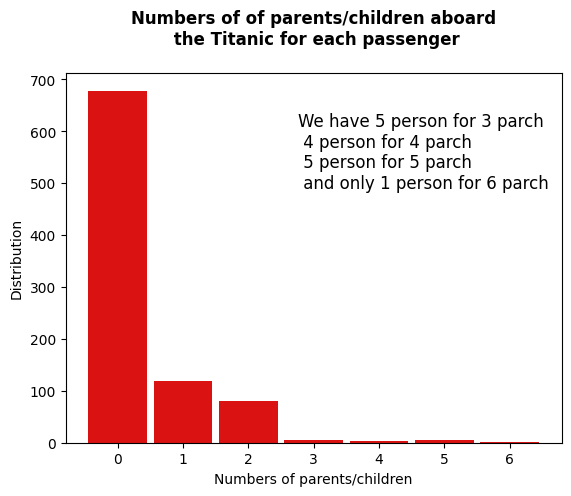

In [14]:
# Histogram chart for Parch (of parents / children aboard the Titanic)
list_parch = list(train_data['Parch'])
bins = 7

plt.figure('Histogram for Parch')
plt.hist(list_parch, bins, rwidth=0.9, color='#db1212' , histtype='bar')
plt.title('Numbers of of parents/children aboard\n the Titanic for each passenger\n',fontweight='bold')
plt.xlabel('Numbers of parents/children')
plt.text(2.8,450,'We have 5 person for 3 parch\n 4 person for 4 parch\n 5 person for 5 parch\n and only 1 person for 6 parch\n',size=12)
plt.ylabel('Distribution')
bin_center = 0.5 * ( plt.hist(list_parch, bins, rwidth=0.9, color='#db1212')[1][1:] + plt.hist(list_parch, bins, rwidth=0.9, color='#db1212')[1][:-1])
plt.xticks(bin_center, [0,1,2,3,4,5,6])
plt.show()

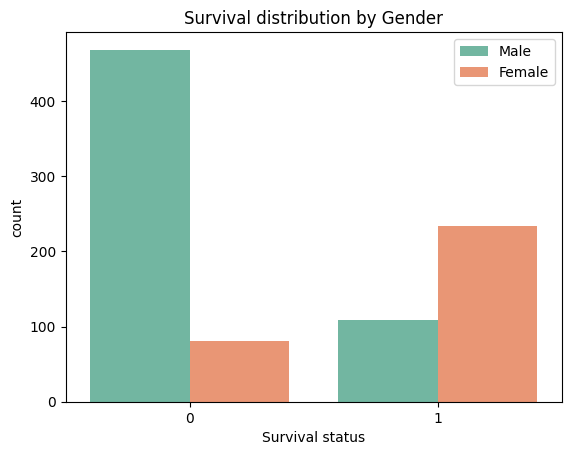

In [15]:
# Chart survived by Gender
plt.figure("Survived people by Gender")
sns.countplot(x='Survived', hue='Sex', data=train_data, palette='Set2')
plt.title('Survival distribution by Gender')
plt.xlabel('Survival status')
plt.ylabel('count')
plt.legend(loc='best', labels=['Male','Female'])
plt.show()

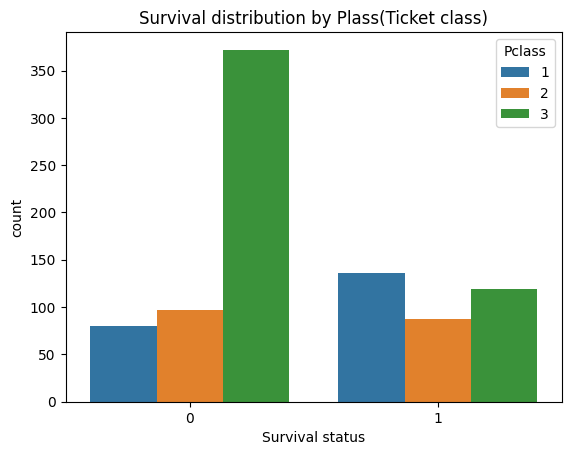

In [16]:
# Chart Survived by Pclass
plt.figure("Survived people by Pclass")
sns.countplot(x='Survived', hue='Pclass', data=train_data)
plt.title('Survival distribution by Plass(Ticket class)')
plt.xlabel('Survival status')
plt.ylabel('count')
plt.show()

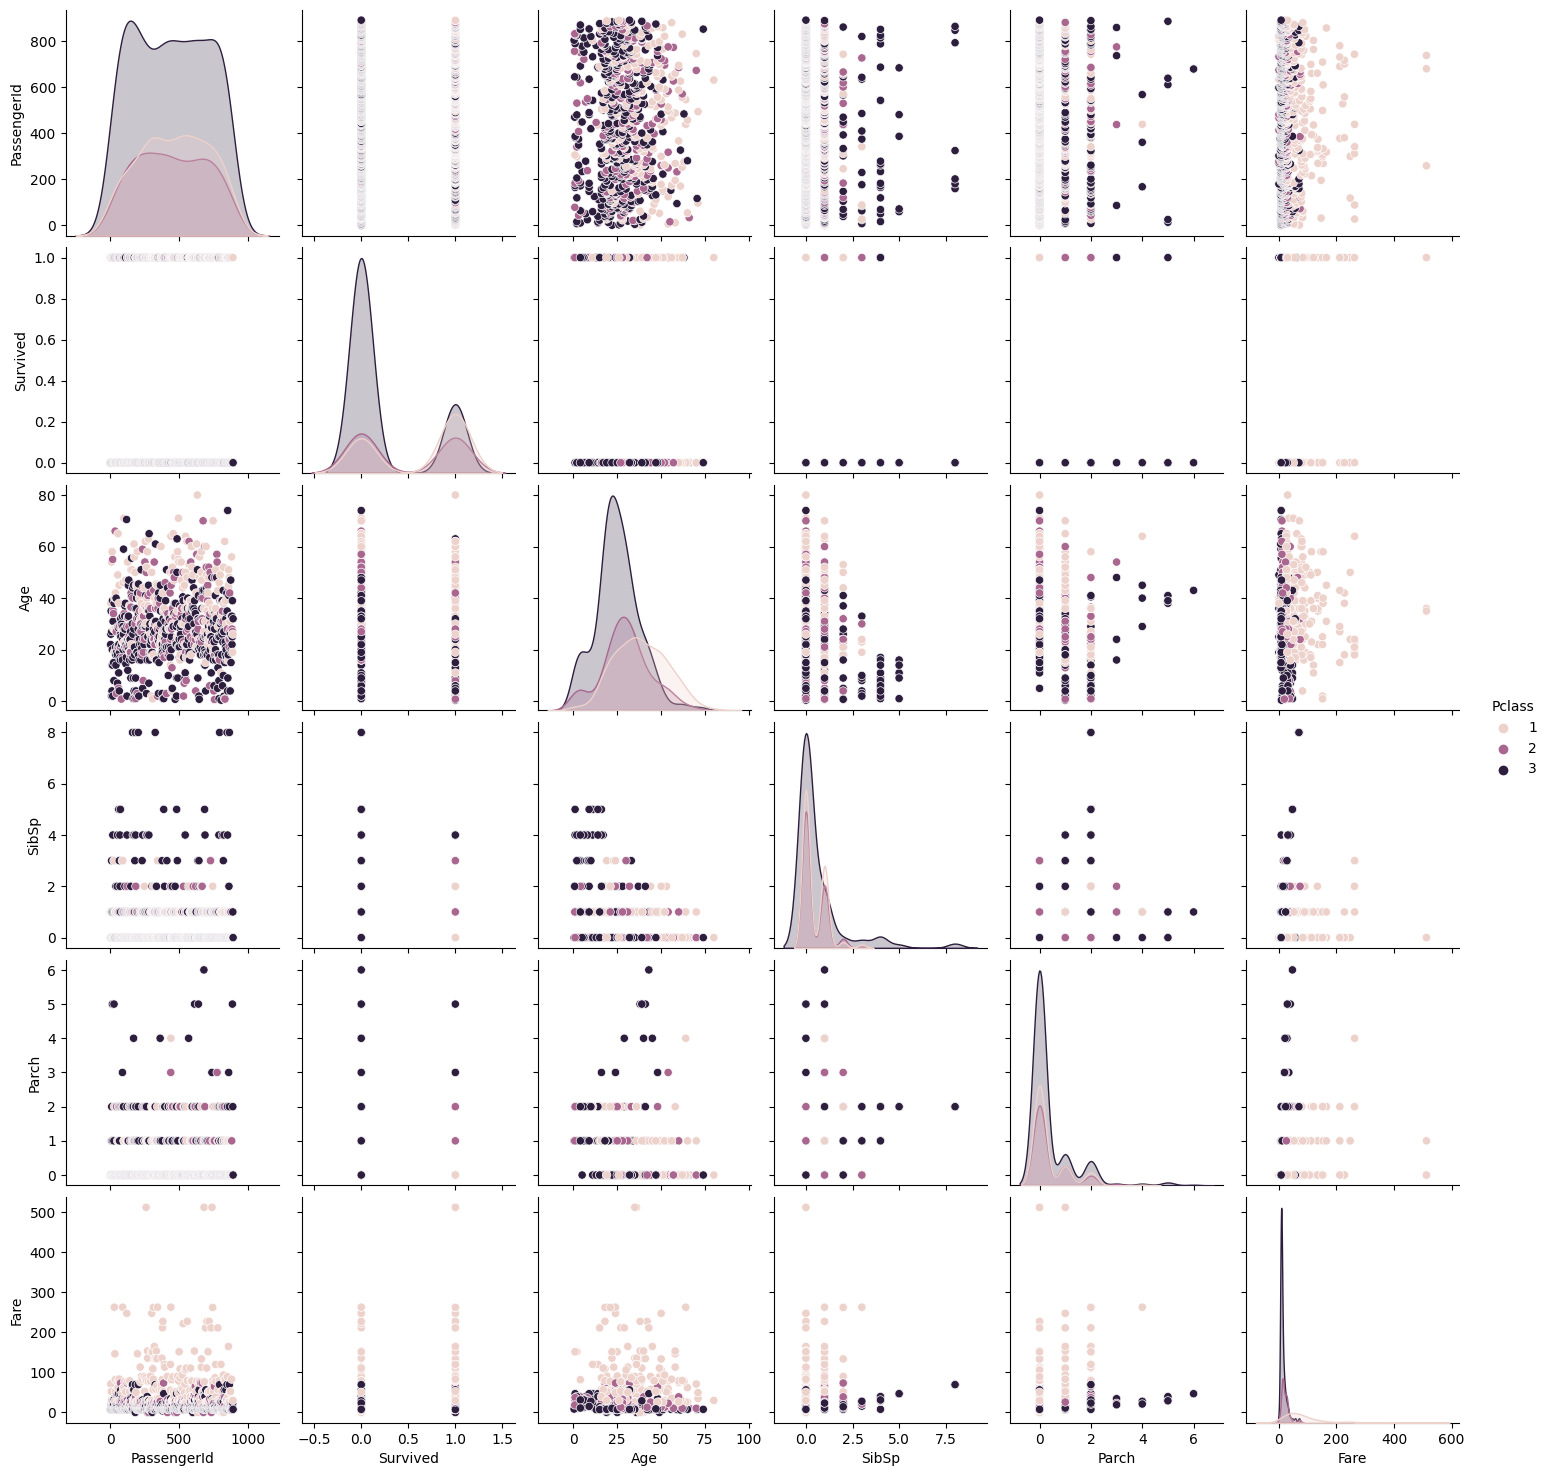

In [17]:
# Pairplot by Pclass (Ticket class)
sns.pairplot(train_data.select_dtypes(['number']), hue='Pclass')
plt.show()

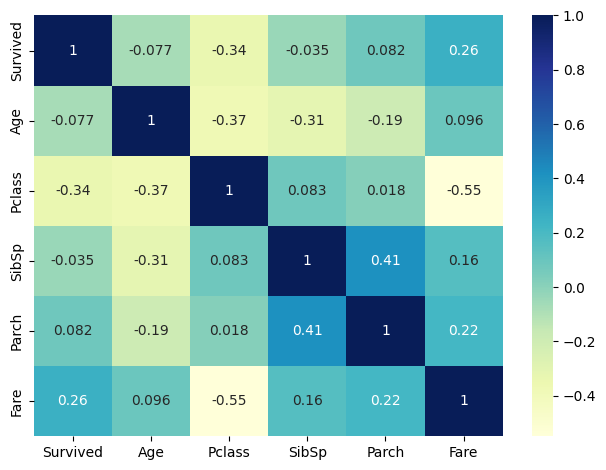

In [18]:
# heatmap for train_data
plt.figure("Heatmap for correlations")
sns.heatmap(train_data[['Survived','Age','Pclass','SibSp','Parch','Fare']].corr(), annot=True, cmap='YlGnBu')
plt.tight_layout()
plt.show()

**It is time to implement the algorithm to get the results on the test data. Here, according to the selected variables and today's science, I chose the random forest algorithm.**

In [19]:
# Machine Learning Algorithm for predicting Survived people in Test File
features = ['Pclass','Sex','SibSp','Parch','Embarked','Age']

X_train = train_data[features]
X_train["Age"].fillna(train_data['Age'].mean(), inplace=True)
X_train = pd.get_dummies(X_train, columns=['Pclass','Sex','Embarked'], drop_first=True)

X_test = test_data[features]
X_test = pd.get_dummies(test_data[features], columns=['Pclass','Sex','Embarked'], drop_first=True)
X_test["Age"].fillna(test_data['Age'].mean(), inplace=True)

Y_train = train_data['Survived']

RFC = RandomForestClassifier(random_state=1234)

list_cv = {'n_estimators':np.arange(20,50), 'max_depth':np.arange(1,10)}
RFC_CV = GridSearchCV(RFC, list_cv)

RFC_CV.fit(X_train, Y_train)

score = RFC_CV.score(X_train, Y_train)
print(RFC_CV.best_params_)
print(RFC_CV.best_score_)

predictions = RFC_CV.predict(X_test)

/tmp/ipykernel_19/1911813317.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["Age"].fillna(train_data['Age'].mean(), inplace=True)


{'max_depth': 5, 'n_estimators': 36}
0.831648986253217


* Now we create csv file for upload in kaggle. :)))))

In [20]:
# Create CSV File 
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission6.csv', index=False)

print("Your submission was successfully saved!")

Your submission was successfully saved!
